In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from os import path
from pydub import AudioSegment
import scipy.io.wavfile as wavfile
import soundfile as sf

from glob import glob


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [40]:
audio_files_talking = glob('../lab0/M02_LT_z01.wav')
audio_talking = audio_files_talking[0]
print(audio_talking)

../lab0/M02_LT_z01.wav


In [83]:
with sf.SoundFile(audio_talking) as audio:
    diskretizacijos_daznis = audio.samplerate
    kanalu_skaicius = audio.channels
    kvantavimo_bitai = audio.subtype

print(f"Diskretizavimo daznis: {diskretizacijos_daznis}")
print(f"Kanalu skaicius: {kanalu_skaicius}")
print(f"Kvantavimo bitu skaicius: {kvantavimo_bitai}")

Diskretizavimo daznis: 11025
Kanalu skaicius: 1
Kvantavimo bitu skaicius: PCM_16


In [41]:
ipd.Audio(audio_talking)

In [78]:
y, sr = librosa.load(audio_talking, sr=None)
duration_in_seconds = len(y) / sr
time_in_milliseconds = pd.Series(range(len(y))) * (duration_in_seconds / len(y)) * 1000
audio_series = pd.Series(y, index=time_in_milliseconds)

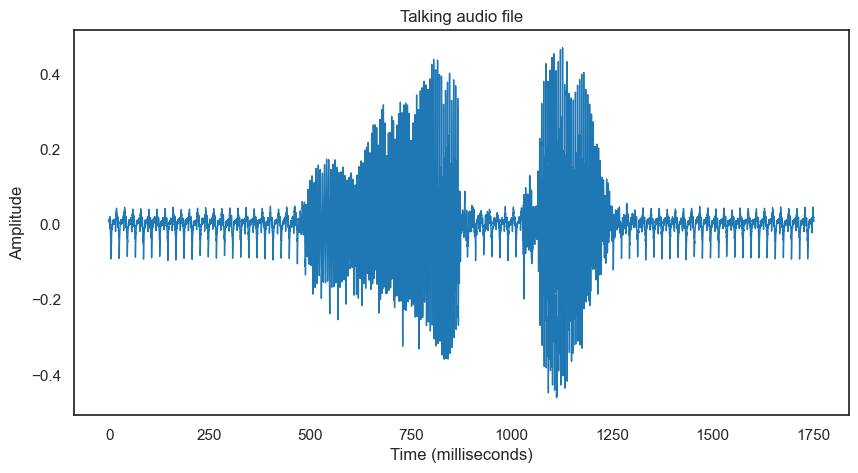

In [79]:
audio_series.plot(figsize=(10, 5), lw=1, title='Talking audio file')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.show()

In [110]:
start_in_miliseconds = 400
end_in_miliseconds = 1250

start_sample = int(sr * start_in_miliseconds/1000)
end_sample = int(sr * end_in_miliseconds/1000)

y_segment = y[start_sample:end_sample]
time_in_miliseconds = (pd.Series(range(start_sample, end_sample)) - start_sample) * (1000.0 / sr)
audio_series_segment = pd.Series(y_segment, index=time_in_miliseconds)

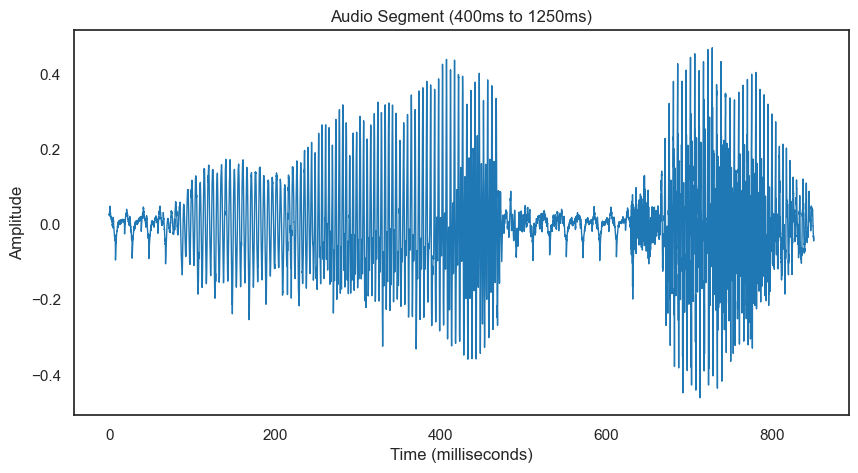

In [111]:
audio_series_segment.plot(figsize=(10, 5), lw=1, title=f'Audio Segment ({start_in_miliseconds}ms to {end_in_miliseconds}ms)')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.show()

In [112]:
wavfile.write('y_trimmed.wav', sr, y_segment)